In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [8]:
# Parameters
max_features = 20000  # Vocabulary size
max_len = 500  # Maximum review length
embedding_dim = 64

# Loading and preparing the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [9]:
# Function to plot graphs
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [10]:
# RNN Model
def build_rnn_model():
    model = Sequential()
    model.add(Embedding(max_features, embedding_dim, input_length=max_len))
    model.add(SimpleRNN(64))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# LSTM Model
def build_lstm_model():
    model = Sequential()
    model.add(Embedding(max_features, embedding_dim, input_length=max_len))
    model.add(LSTM(64))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Bidirectional LSTM
def build_bidirectional_lstm_model():
    model = Sequential()
    model.add(Embedding(max_features, embedding_dim, input_length=max_len))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Deep LSTM
def build_deep_lstm_model():
    model = Sequential()
    model.add(Embedding(max_features, embedding_dim, input_length=max_len))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [12]:
# Training and evaluating models
models = {
    "RNN": build_rnn_model(),
    "LSTM": build_lstm_model(),
    "Bidirectional LSTM": build_bidirectional_lstm_model(),
    "Deep LSTM": build_deep_lstm_model()
}

# Early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

# Saving the best model
checkpoint = ModelCheckpoint('/kaggle/working/best_model.keras', monitor='val_accuracy', save_best_only=True, mode='min')


In [13]:
histories = {}
for name, model in models.items():
    print(f"Training {name} model...")
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1, callbacks=[early_stopping, checkpoint])
    histories[name] = history
    score, acc = model.evaluate(x_test, y_test, batch_size=64)
    print(f"{name} model - Test accuracy: {acc}")

Training RNN model...
Epoch 1/5


I0000 00:00:1726575255.908128     107 service.cc:145] XLA service 0x7dbee8004a80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726575255.908190     107 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  3/352 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.4835 - loss: 0.7059

I0000 00:00:1726575257.033274     107 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.5556 - loss: 0.6801 - val_accuracy: 0.5452 - val_loss: 0.8474
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.6948 - loss: 0.5962 - val_accuracy: 0.7464 - val_loss: 0.5303
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.8197 - loss: 0.3947 - val_accuracy: 0.7640 - val_loss: 0.5284
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.8826 - loss: 0.2904 - val_accuracy: 0.7992 - val_loss: 0.4998
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9437 - loss: 0.1640 - val_accuracy: 0.7820 - val_loss: 0.5942
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7939 - loss: 0.5039
RNN model - Test accuracy: 0.7967600226402283
Training LSTM model...
Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.7142 - loss: 0.5289 - val_accuracy: 0.8096 - val_loss: 0.4291
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8954 - loss: 0.2738 - val

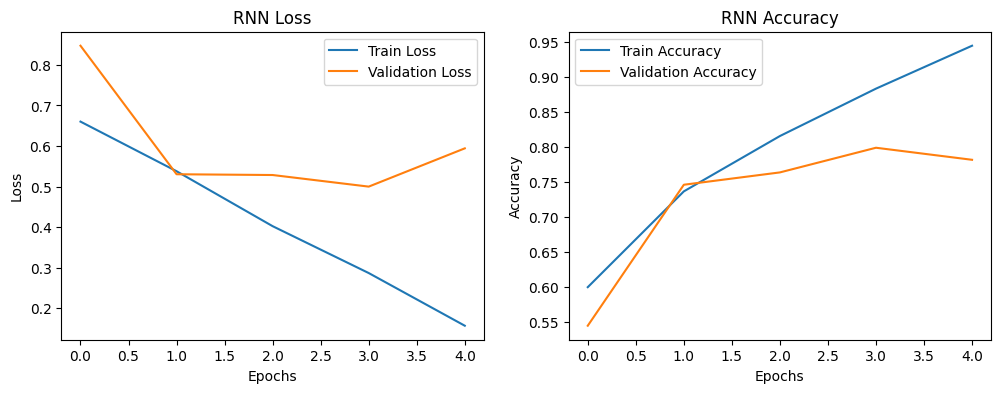

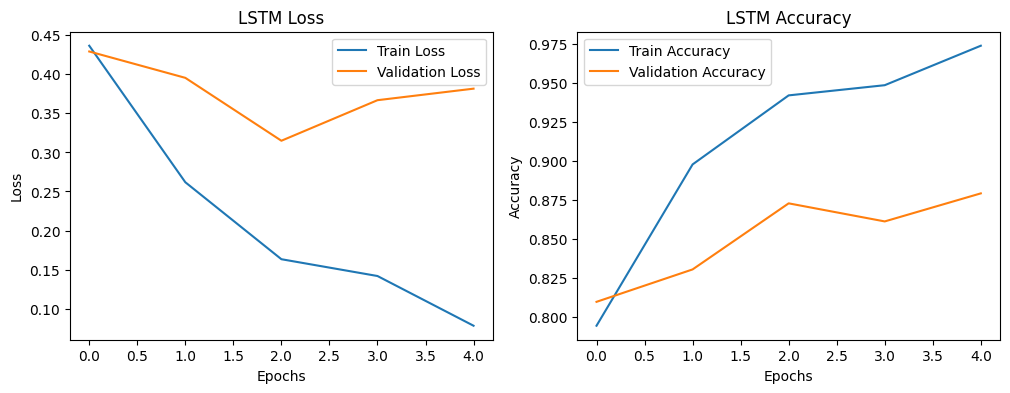

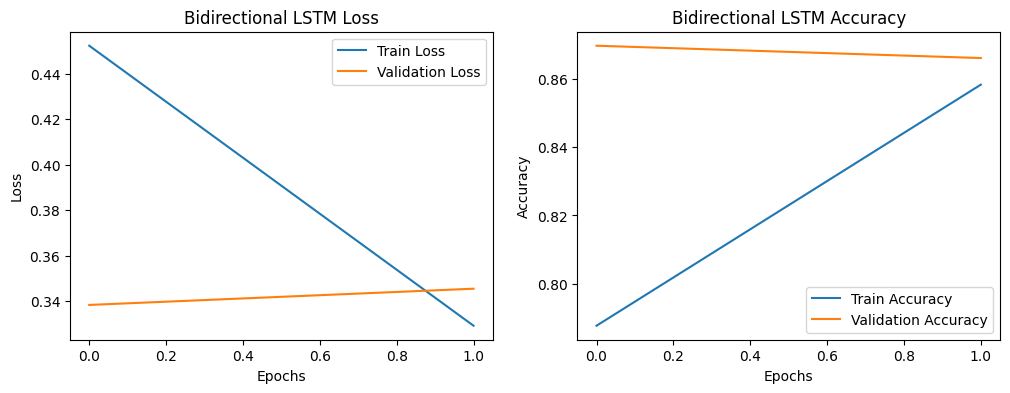

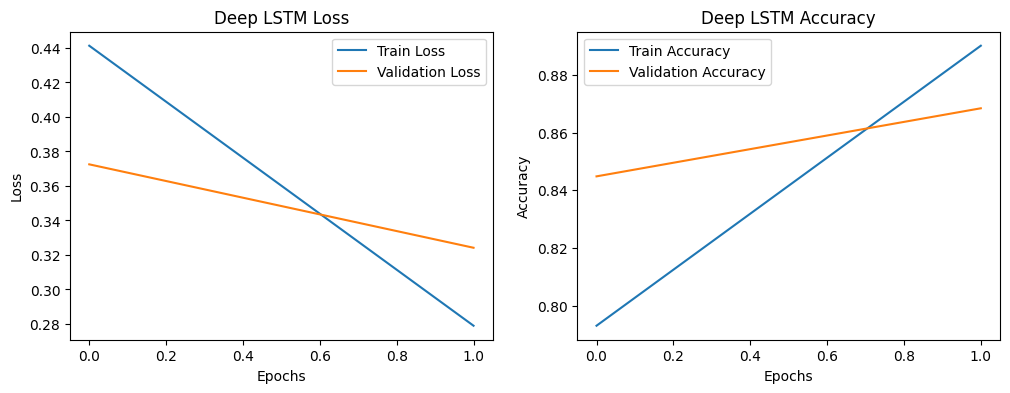

In [17]:
# Displaying graphs
for name, history in histories.items():
    plot_history(history, name)

In [14]:
# Encoding and classifying custom text
custom_text = "I thought the movie was going to be bad. but it was actually amazing"

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts([custom_text])
custom_text_sequence = tokenizer.texts_to_sequences([custom_text])
custom_text_padded = pad_sequences(custom_text_sequence, maxlen=max_len)

# Classifying custom text for each model
for name, model in models.items():
    prediction = model.predict(custom_text_padded)
    print(f"{name} model - Custom text prediction: {prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
RNN model - Custom text prediction: 0.33501729369163513
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
LSTM model - Custom text prediction: 0.32795479893684387
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Bidirectional LSTM model - Custom text prediction: 0.46522295475006104
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Deep LSTM model - Custom text prediction: 0.5983347296714783


In [16]:
# Encoding and classifying custom text
custom_text_2 = "I thought the movie was going to be amazing. but it was actually bad"

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts([custom_text_2])
custom_text_sequence = tokenizer.texts_to_sequences([custom_text_2])
custom_text_padded = pad_sequences(custom_text_sequence, maxlen=max_len)

# Classifying custom text for each model
for name, model in models.items():
    prediction = model.predict(custom_text_padded)
    print(f"{name} model - Custom text prediction: {prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
RNN model - Custom text prediction: 0.33501729369163513
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
LSTM model - Custom text prediction: 0.32795479893684387
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Bidirectional LSTM model - Custom text prediction: 0.46522295475006104
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Deep LSTM model - Custom text prediction: 0.5983347296714783


In [ ]:
# As the result shows, more complex models perform better on validation sets.
# However, as practice shows in a more real-world example, the model does not recognize differences in the meaning of the text due to word rearrangement.
# That is, the model performed well on the training datasets, but it is insufficient for real-world use.
# A more complex architecture is required.